# Dfs2 - Bathymetric data

[*GEBCO Compilation Group (2020) GEBCO 2020 Grid
(doi:10.5285/a29c5465-b138-234d-e053-6c86abc040b9*)](https://www.gebco.net/data_and_products/gridded_bathymetry_data/)

In [1]:
import xarray
import mikeio

In [3]:
ds = xarray.open_dataset("../../data/gebco_2020_n56.3_s55.2_w12.2_e13.1.nc")
ds

<xarray.Dataset> Size: 118kB
Dimensions: (lat: 264, lon: 216)
Coordinates: (2)
Data variables:
 elevation (lat, lon) int16 114kB ...
Attributes: (8) xarray.Dataset Dimensions: lat : 264 lon : 216 Coordinates: (2) lat (lat) float64 55.2 55.21 55.21 ... 56.29 56.3 standard_name : latitude long_name : latitude units : degrees_north axis : Y sdn_parameter_urn : SDN:P01::ALATZZ01 sdn_parameter_name : Latitude north sdn_uom_urn : SDN:P06::DEGN sdn_uom_name : Degrees north array([55.202083, 55.20625 , 55.210417, ..., 56.289583, 56.29375 , 56.297917],
 shape=(264,)) lon (lon) float64 12.2 12.21 12.21 ... 13.09 13.1 standard_name : longitude long_name : longitude units : degrees_east axis : X sdn_parameter_urn : SDN:P01::ALONZZ01 sdn_parameter_name : Longitude east sdn_uom_urn : SDN:P06::DEGE sdn_uom_name : Degrees east array([12.202083, 12.20625 , 12.210417, ..., 13.089583, 13.09375 , 13.097917],
 shape=(216,)) Data variables: (1) elevation (lat, lon) int16 ... standard_name : height_above_reference_ellipsoid long_name : Elevation relative to sea level units : m sdn_parameter_urn : SDN:P01::BATHHGHT sdn_parameter_name : Sea floor height (above mean sea level) {bathymetric height} sdn_uom_urn : SDN:P06::ULAA sdn_uom_name : Metres [57024 values with dtype=int16] Attributes: (8) Conventions : CF-1.6 title : The GEBCO_2020 Grid - a continuous terrain model for oceans and land at 15 arc-second intervals institution : On behalf of the General Bathymetric Chart of the Oceans (GEBCO), the data are held at the British Oceanographic Data Centre (BODC). source : The GEBCO_2020 Grid is the latest global bathymetric product released by the General Bathymetric Chart of the Oceans (GEBCO) and has been developed through the Nippon Foundation-GEBCO Seabed 2030 Project. This is a collaborative project between the Nippon Foundation of Japan and GEBCO. The Seabed 2030 Project aims to bring together all available bathymetric data to produce the definitive map of the world ocean floor and make it available to all. history : Information on the development of the data set and the source data sets included in the grid can be found in the data set documentation available from https://www.gebco.net references : DOI: 10.5285/a29c5465-b138-234d-e053-6c86abc040b9 comment : The data in the GEBCO_2020 Grid should not be used for navigation or any purpose relating to safety at sea. node_offset : 1.0

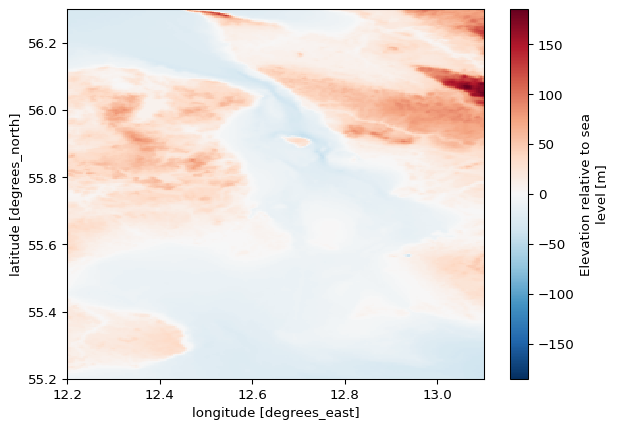

In [4]:
ds.elevation.plot();

In [5]:
ds.elevation.sel(lon=12.74792, lat=55.865, method="nearest")

<xarray.DataArray 'elevation' ()> Size: 2B
[1 values with dtype=int16]
Coordinates: (2)
Attributes: (7) xarray.DataArray 'elevation' ... [1 values with dtype=int16] Coordinates: (2) lat () float64 55.86 standard_name : latitude long_name : latitude units : degrees_north axis : Y sdn_parameter_urn : SDN:P01::ALATZZ01 sdn_parameter_name : Latitude north sdn_uom_urn : SDN:P06::DEGN sdn_uom_name : Degrees north array(55.86458333) lon () float64 12.75 standard_name : longitude long_name : longitude units : degrees_east axis : X sdn_parameter_urn : SDN:P01::ALONZZ01 sdn_parameter_name : Longitude east sdn_uom_urn : SDN:P06::DEGE sdn_uom_name : Degrees east array(12.74791667) Attributes: (7) standard_name : height_above_reference_ellipsoid long_name : Elevation relative to sea level units : m sdn_parameter_urn : SDN:P01::BATHHGHT sdn_parameter_name : Sea floor height (above mean sea level) {bathymetric height} sdn_uom_urn : SDN:P06::ULAA sdn_uom_name : Metres

Check ordering of dimensions, should be (y,x)

In [6]:
ds.elevation.dims

('lat', 'lon')

In [7]:
el = ds.elevation.values
el.shape

(264, 216)

Check that axes are increasing, S-\>N W-\>E

In [8]:
ds.lat.values[0],ds.lat.values[-1] 

(np.float64(55.20208333333332), np.float64(56.29791666666665))

In [9]:
ds.lat.values[0] < ds.lat.values[-1] 

np.True_

In [10]:
ds.lon.values[0],ds.lon.values[-1] 

(np.float64(12.20208333333332), np.float64(13.097916666666663))

In [11]:
el[0,0] # Bottom left

np.int16(-8)

In [12]:
el[-1,0] # Top Left

np.int16(-31)

In [13]:
geometry = mikeio.Grid2D(x=ds.lon.values, y=ds.lat.values, projection="LONG/LAT")
geometry

<mikeio.Grid2D>
x: [12.2, 12.21, ..., 13.1] (nx=216, dx=0.004167)
y: [55.2, 55.21, ..., 56.3] (ny=264, dy=0.004167)
projection: LONG/LAT

In [14]:
da = mikeio.DataArray(data=el,
               item=mikeio.ItemInfo("Elevation", mikeio.EUMType.Total_Water_Depth),
               geometry=geometry,
               dims=("y","x") # No time dimension
               )
da

<mikeio.DataArray>
name: Elevation
dims: (y:264, x:216)
time: 2018-01-01 00:00:00 (time-invariant)
geometry: Grid2D (ny=264, nx=216)

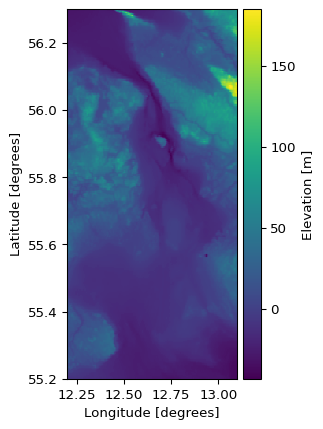

In [15]:
da.plot();

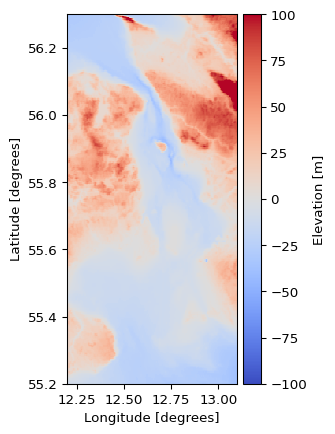

In [16]:
da.plot(cmap='coolwarm', vmin=-100, vmax=100);

In [17]:
da.to_dfs("gebco.dfs2")

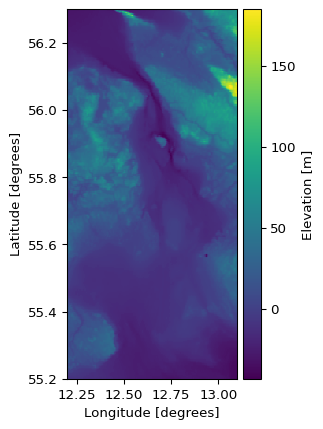

In [18]:
ds = mikeio.read("gebco.dfs2")
ds.Elevation.plot()

# Clean up

In [19]:
import os

os.remove("gebco.dfs2")